In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import gc
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#追記
import json;import datetime;import math
#importじゃないけど、個人的には省略されて良いことがあまりないので・・
pd.set_option('display.max_columns', 500);pd.set_option('display.max_rows', 1000)

In [33]:
df_vr = pd.read_csv("../data/viewing_rating.csv", encoding = "cp932")

In [34]:
################
# 視聴率csvからのdrama_key作成
df_vr.start_at = pd.to_datetime(df_vr.start_at)
df_vr["drama_key"] = df_vr.start_at.dt.strftime("%y")+df_vr.start_at.dt.strftime("%m")+"_"+df_vr.TV_station+"_"+df_vr.time_table

In [37]:
df_vr[df_vr.drama_key =="1910_EX_木21"]


,TV_station,time_table,drama_title,Episode1,Episode2,Episode3,Episode4,Episode5,Episode6,Episode7,Episode8,Episode9,Episode10,Episode11,Episode12,Episode13,Episode14,Episode15,average,suii,start_at,drama_key
4,EX,木21,ドクターX,20.3,19.0,18.1,17.8,15.9,19.3,18.6,17.4,18.2,19.3,-,-,-,-,-,18.48%,3-6-0,2019-10-01,1910_EX_木21


In [5]:
df_vr["extension_rate"] =  df_vr["average"].apply(lambda x: float(x[:-1])) / df_vr["Episode1"]

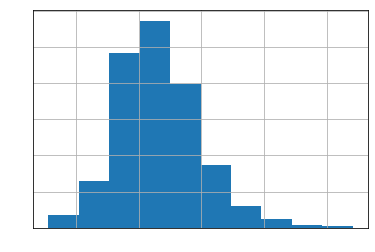

In [6]:
plt.tick_params(colors='white')
df_vr["extension_rate"].hist()




In [7]:
df_vr[df_vr["extension_rate"]<0.8].count()[0]

309

In [8]:
df_vr[df_vr["extension_rate"]>0.91].count()[0]

307

In [9]:
df_vr[(df_vr.extension_rate<0.91) & (df_vr.extension_rate>0.8)].count()[0]

321

In [10]:
drama_win_lose_dict = {}

In [11]:
drama_win_lose_dict["lose"] = df_vr[df_vr["extension_rate"]<0.8].drama_key.values.tolist()

In [12]:
drama_win_lose_dict["draw"] = df_vr[(df_vr.extension_rate<0.91) & (df_vr.extension_rate>=0.8)].drama_key.values.tolist()


In [13]:

drama_win_lose_dict["win"] = df_vr[df_vr["extension_rate"]>=0.91].drama_key.values.tolist()

In [14]:
print(drama_win_lose_dict)

{'lose': ['1910_CX_月21', '1910_CX_木22', '1910_TBS_金22', '1910_EX_金23', '1910_EX_土23', '1907_CX_火21', '1907_EX_木21', '1904_NTV_土22', '1904_EX_土23', '1904_TBS_日21', '1901_CX_火21', '1901_CX_木22', '1901_NTV_木23', '1901_EX_金23', '1810_CX_月21', '1810_NTV_水22', '1810_NTV_木23', '1810_EX_金23', '1810_NTV_土22', '1807_CX_火21', '1804_NTV_木23', '1804_NTV_日22', '1801_CX_月21', '1801_NTV_水22', '1801_NTV_土22', '1710_CX_月21', '1710_CX_火21', '1710_NTV_日22', '1707_CX_火21', '1707_TBS_金22', '1707_EX_金23', '1707_NTV_土22', '1707_CX_日21', '1704_CX_月21', '1704_CX_火21', '1704_EX_木21', '1704_CX_木22', '1704_EX_金23', '1704_NTV_土22', '1704_CX_日21', '1704_NTV_日22', '1701_CX_月21', '1701_NTV_木23', '1701_TBS_金22', '1701_NTV_土21', '1701_CX_日21', '1610_NTV_日22', '1607_CX_木22', '1607_EX_金23', '1607_NTV_土21', '1607_NTV_日22', '1604_NTV_木23', '1604_NTV_土21', '1604_CX_土23', '1601_CX_火22', '1601_EX_木21', '1601_NTV_土21', '1601_NTV_日22', '1510_CX_火22', '1510_TBS_火22', '1510_CX_水22', '1510_EX_木21', '1510_NTV_土21', '1510_NTV_日22', '

In [16]:
import json

fw1 = open('../data/drama_win_lose.json','w')
# json.dump関数でファイルに書き込む
json.dump(drama_win_lose_dict ,fw1,indent=4)

In [17]:

df_vr["extension_rate_std"] = df_vr["extension_rate"]

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(-1, 1))


y = df_vr["extension_rate_std"].values
y = np.array(y).reshape(-1,1)
y_std = scaler.fit_transform(y)

# pd.DataFrame( , )

# scaler.transform(df_vr["extension_rate_std"].values

In [19]:
df_vr["extension_rate_std"] = [i[0] for i in y_std] 
# y_std

In [20]:
df_vr[["extension_rate_std","extension_rate"]]

,extension_rate_std,extension_rate
0,-0.693990,0.773438
1,-0.361362,0.817391
2,0.875030,0.980769
3,3.627206,1.344444
4,0.342081,0.910345
5,-0.520001,0.796429
6,-0.330809,0.821429
7,-1.021976,0.730097
8,-0.640396,0.780519
9,1.065608,1.005952


In [21]:
drama_win_lose_std_dict = {}

In [22]:
for drama_key  in df_vr.drama_key.values:
#     print (drama_key)
    drama_win_lose_std_dict [drama_key ] = df_vr[df_vr["drama_key"] == drama_key]\
                                    .extension_rate_std.values[0]
    

In [23]:
drama_win_lose_std_dict

{'1910_CX_月21': -0.6939899241570875,
 '1910_CX_火22': -0.3613617164698911,
 '1910_TBS_火22': 0.8750297096545289,
 '1910_NTV_水22': 3.627206371036682,
 '1910_EX_木21': 0.342080551878877,
 '1910_CX_木22': -0.5200009146602959,
 '1910_NTV_木23': -0.33080898200359155,
 '1910_TBS_金22': -1.0219761811960486,
 '1910_EX_金23': -0.6403957808963815,
 '1910_NTV_土22': 1.0656076637958978,
 '1910_EX_土23': -0.5973552516578661,
 '1910_TBS_日21': 0.990047137696445,
 '1910_NTV_日22': 0.12796412942035978,
 '1907_CX_月21': 0.39084283203001424,
 '1907_CX_火21': -0.6461288697647671,
 '1907_TBS_火22': -0.46494506124167934,
 '1907_NTV_水22': 1.1779097115162147,
 '1907_EX_木21': -0.6781963668417774,
 '1907_CX_木22': -0.0875622114449709,
 '1907_NTV_木23': 1.4599754865534214,
 '1907_TBS_金22': 0.763407882321595,
 '1907_EX_金23': 0.16919826858912868,
 '1907_NTV_土22': 0.023550510908967405,
 '1907_EX_土23': 0.26379423491748083,
 '1907_TBS_日21': 0.1572861839403741,
 '1907_NTV_日22': 2.9042555559088865,
 '1904_CX_月21': 0.692827908973632,


In [30]:
import json
fw2 = open('../data/drama_win_lose_std.json','w')
# json.dump関数でファイルに書き込む
json.dump(drama_win_lose_std_dict ,fw2,indent=4)

In [27]:

fw3 = open('../data/drama_win_lose_std.json','r')
# json.dump関数でファイルに書き込む
drama_dict = json.load(fw3)


# drama_win_lose_dic = json.load(f) #JSON形式で読み込む



In [29]:
drama_dict

{'1910_CX_月21': -0.6939899241570875,
 '1910_CX_火22': -0.3613617164698911,
 '1910_TBS_火22': 0.8750297096545289,
 '1910_NTV_水22': 3.627206371036682,
 '1910_EX_木21': 0.342080551878877,
 '1910_CX_木22': -0.5200009146602959,
 '1910_NTV_木23': -0.33080898200359155,
 '1910_TBS_金22': -1.0219761811960486,
 '1910_EX_金23': -0.6403957808963815,
 '1910_NTV_土22': 1.0656076637958978,
 '1910_EX_土23': -0.5973552516578661,
 '1910_TBS_日21': 0.990047137696445,
 '1910_NTV_日22': 0.12796412942035978,
 '1907_CX_月21': 0.39084283203001424,
 '1907_CX_火21': -0.6461288697647671,
 '1907_TBS_火22': -0.46494506124167934,
 '1907_NTV_水22': 1.1779097115162147,
 '1907_EX_木21': -0.6781963668417774,
 '1907_CX_木22': -0.0875622114449709,
 '1907_NTV_木23': 1.4599754865534214,
 '1907_TBS_金22': 0.763407882321595,
 '1907_EX_金23': 0.16919826858912868,
 '1907_NTV_土22': 0.023550510908967405,
 '1907_EX_土23': 0.26379423491748083,
 '1907_TBS_日21': 0.1572861839403741,
 '1907_NTV_日22': 2.9042555559088865,
 '1904_CX_月21': 0.692827908973632,
